## Guided Project: Visualizing Earnings based on College Majors##

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

Rank - Rank by median earnings (the dataset is ordered by this column).<br>
Major_code - Major code.<br>
Major - Major description.<br>
Major_category - Category of major.<br>
Total - Total number of people with major.<br>
Sample_size - Sample size (unweighted) of full-time.<br>
Men - Male graduates.<br>
Women - Female graduates.<br>
ShareWomen - Women as share of total.<br>
Employed - Number employed.<br>
Median - Median salary of full-time, year-round workers.<br>
Low_wage_jobs - Number in low-wage service jobs.<br>
Full_time - Number employed 35 hours or more.<br>
Part_time - Number employed less than 35 hours.<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")

In [3]:
recent_grads.head(1)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


In [4]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [5]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [6]:
recent_grads = recent_grads.dropna()

In [7]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
Rank                    172 non-null int64
Major_code              172 non-null int64
Major                   172 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          172 non-null object
ShareWomen              172 non-null float64
Sample_size             172 non-null int64
Employed                172 non-null int64
Full_time               172 non-null int64
Part_time               172 non-null int64
Full_time_year_round    172 non-null int64
Unemployed              172 non-null int64
Unemployment_rate       172 non-null float64
Median                  172 non-null int64
P25th                   172 non-null int64
P75th                   172 non-null int64
College_jobs            172 non-null int64
Non_college_jobs        172 non-null int64
Low_wage_jobs          

Generating the scatter plots using pandas dataframe.plot function

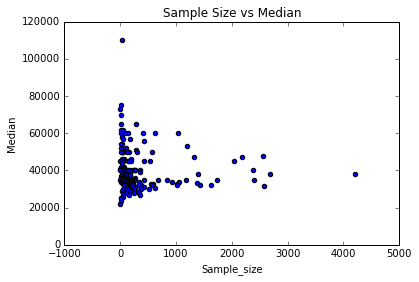

In [8]:
recent_grads.plot(x='Sample_size', y='Median', kind = 'scatter', title = 'Sample Size vs Median')

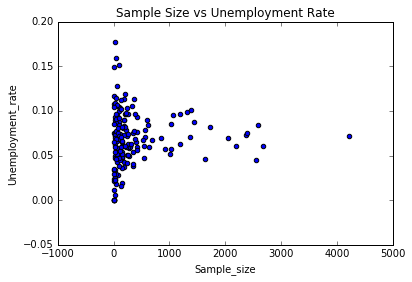

In [9]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind = 'scatter', title = 'Sample Size vs Unemployment Rate')
ax.set_title('Sample Size vs Unemployment Rate')

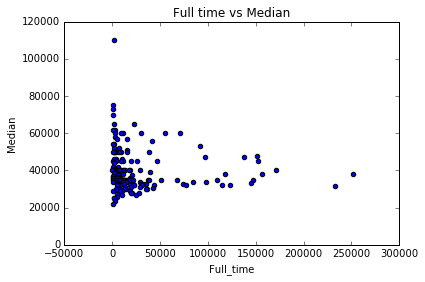

In [10]:
ax = recent_grads.plot(x='Full_time', y='Median', kind = 'scatter')
ax.set_title('Full time vs Median')

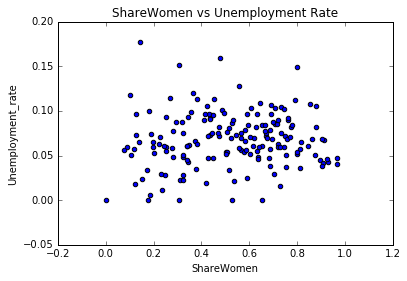

In [11]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind = 'scatter', title = 'ShareWomen vs Unemployment Rate')


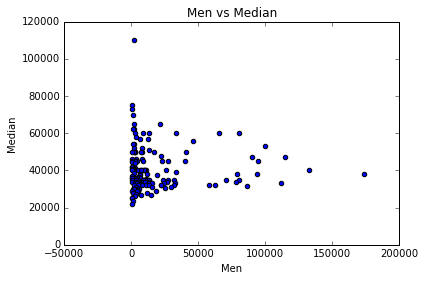

In [12]:
ax = recent_grads.plot(x='Men', y='Median', kind = 'scatter')
ax.set_title('Men vs Median')

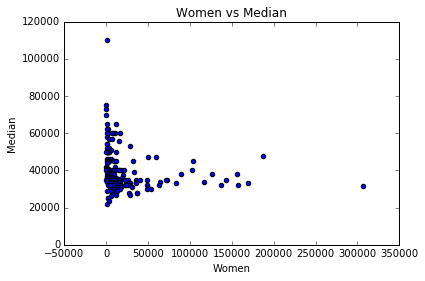

In [13]:
ax = recent_grads.plot(x='Women', y='Median', kind = 'scatter')
ax.set_title('Women vs Median')

In [14]:
#Finding the correlation between popular majors and median salary
recent_grads[["Major","Total","Median"]].sort_values("Total", ascending = False)


,Major,Total,Median
145,PSYCHOLOGY,393735.0,31500
76,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,38000
123,BIOLOGY,280709.0,33400
57,GENERAL BUSINESS,234590.0,40000
93,COMMUNICATIONS,213996.0,35000
34,NURSING,209394.0,48000
77,MARKETING AND MARKETING RESEARCH,205211.0,38000
40,ACCOUNTING,198633.0,45000
137,ENGLISH LANGUAGE AND LITERATURE,194673.0,32000
78,POLITICAL SCIENCE AND GOVERNMENT,182621.0,38000


### Exploring the distributions of various columns below ###

## Pandas - Histograms##

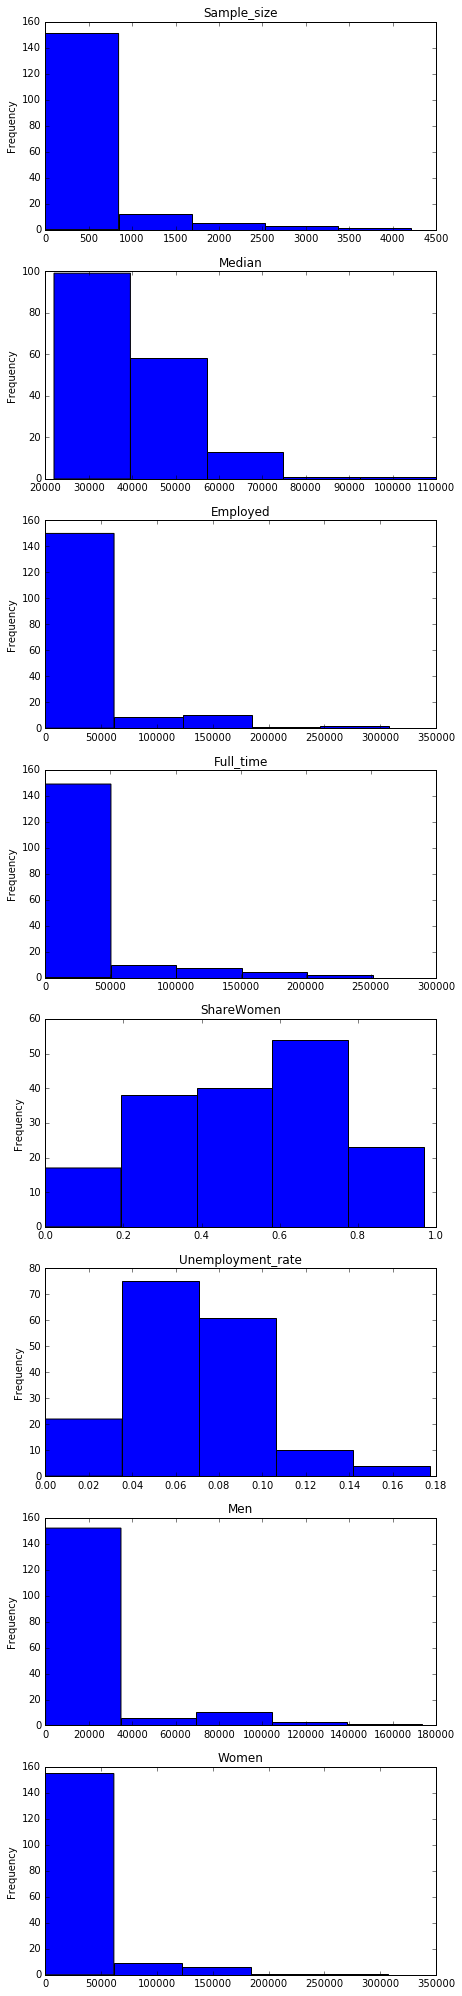

In [15]:
columns = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(7,35))

for i in range(1,9):
    ax = fig.add_subplot(8,1,i)
    ax = recent_grads[columns[i-1]].plot(kind = "hist", bins = 5)
    ax.set_title(columns[i-1])


## Pandas - Bar Plots##

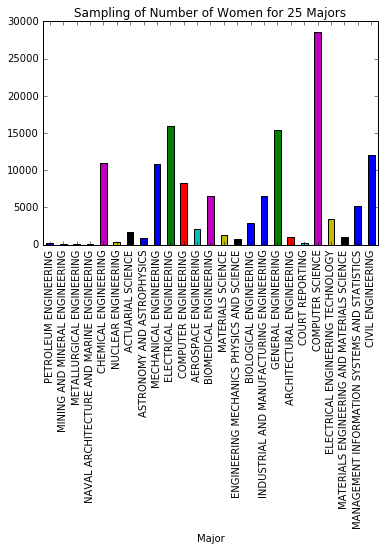

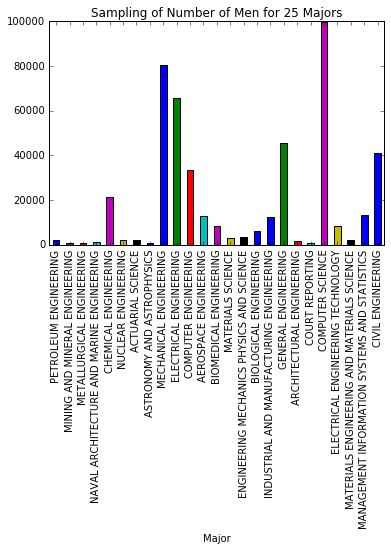

In [45]:
recent_grads[:25].plot(kind = "bar", x = "Major", y = "Women", title = "Sampling of Number of Women for 25 Majors", legend = False)
recent_grads[:25].plot(kind = "bar", x = "Major", y = "Men", title = "Sampling of Number of Men for 25 Majors", legend = False)


## Pandas - Box Plots ##

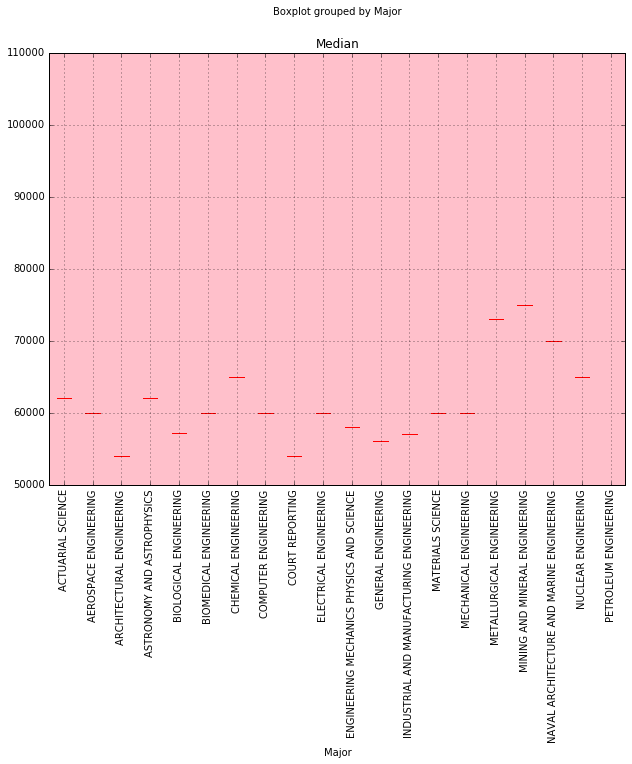

In [111]:
fig, ax = plt.subplots(figsize=(10,8))
recent_grads[:20].boxplot(by = "Major", column = "Median" , rot = 90, ax=ax)
ax.set_axis_bgcolor("Pink")

## Pandas - Scatter Matrix Plot ##

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3211b036d8>,
      dtype=object)

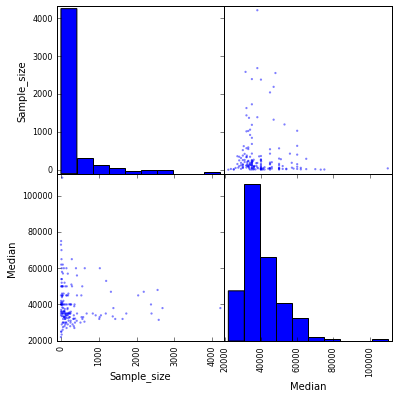

In [112]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32110d4438>,
      dtype=object)

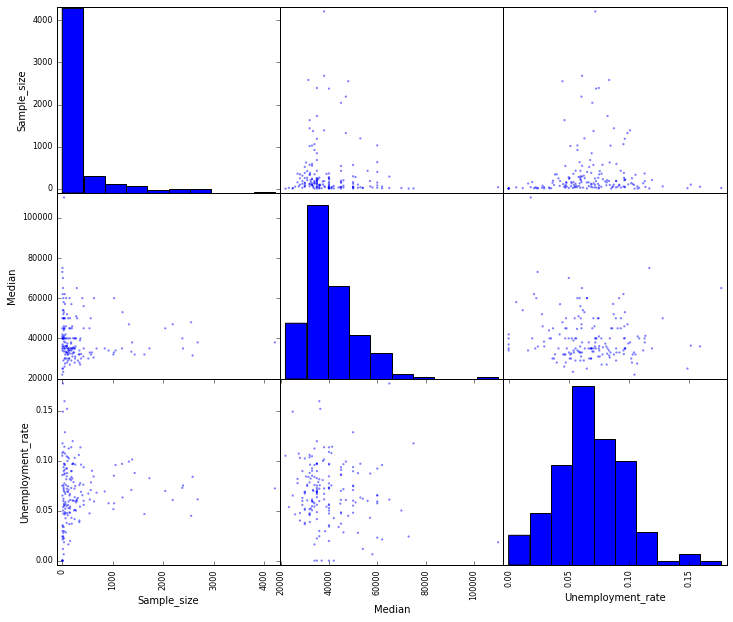

In [118]:
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]], figsize = (12,10))